## Variational Zero-inflated Gaussian Processes in GPFlow

In [1]:
gpf.__file__

NameError: name 'gpf' is not defined

In [2]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import gpflow as gpf
import numpy as np
gpf.config.set_default_float(np.float32)

gpf.config.set_default_jitter(tf.cast(1e-6, dtype=gpf.default_float()))
from onoffgpf import OnOffSVGP, OnOffLikelihood, OnOffPoissonLikelihood
from onoffgpf.PlotOnOff1D import PlotOnOff1D

from gpflow.ci_utils import ci_niter

import gpflow

import scipy.io as sio
import matplotlib.pyplot as plt

import tensorflow_probability as tfp

2022-10-07 13:25:56.932251: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-07 13:25:56.932311: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-07 13:25:56.999153: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-07 13:26:01.350633: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-07 13:26:01.351292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

** Load simulated dataset **

In [3]:
matdata = sio.loadmat('data/toydata.mat')
Xtrain = matdata['x'].astype(gpf.default_float())
Ytrain = matdata['y'].astype(gpf.default_float())

In [4]:
Ytrain[(Xtrain<=2)] = 1
Ytrain[(Xtrain>2) & (Xtrain<3)] = 0
Ytrain[(Xtrain>3) & (Xtrain<3.5)] = 3
Ytrain[(Xtrain>3.5) & (Xtrain<4)] = 4
Ytrain[(Xtrain>=4)] = 5

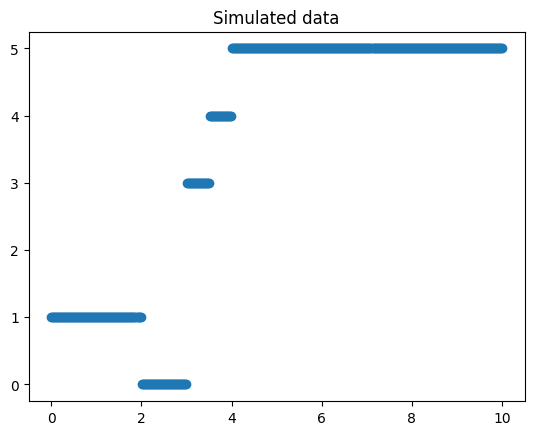

In [5]:
plt.scatter(Xtrain,Ytrain)
plt.title("Simulated data")
plt.show()

**Train specifications & variable initializations**

In [9]:
num_iterations = 8000
num_inducing   = 10

# initalize kernel parameters
kf = gpf.kernels.RBF(variance=1, lengthscales=2)
#kf.lengthscales = 2.
#kf.variance = 1.

kg = gpf.kernels.RBF(variance=5, lengthscales=2)
#kg.lengthscales = 2.
#kg.variance = 5.

# initialise equally spaced inducing point locations
Zf = np.delete(np.linspace(min(Xtrain),max(Xtrain),num_inducing,endpoint=False),0).transpose().reshape(-1,1)
Zg = np.delete(np.linspace(min(Xtrain),max(Xtrain),num_inducing,endpoint=False),0).transpose().reshape(-1,1)

** Model build and training **

In [10]:
# model definition
m = OnOffSVGP(Xtrain, Ytrain
              ,kernf=kf,kerng=kg
              ,likelihood = OnOffPoissonLikelihood()
              ,Zf = Zf,Zg = Zg
             )

# fix the model noise term
#m.likelihood.variance.assign(0.01)
from gpflow import set_trainable
#set_trainable(m.likelihood.variance, True)

minibatch_size = 100

N=len(Xtrain)

train_dataset = tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(Xtrain,),
                                                    tf.convert_to_tensor(Ytrain,)),)#.repeat().shuffle(N)

train_iter = iter(train_dataset)#batch(minibatch_size))


In [8]:
def run_adam(model, iterations):
    """
    Utility function running the Adam optimizer

    :param model: GPflow model
    :param interations: number of iterations
    """
    # Create an Adam Optimizer action
    logf = []
    train_iter = train_dataset#iter(train_dataset.batch(minibatch_size))
    training_loss = model.training_loss_closure(compile=True)
    optimizer = tf.optimizers.Adam(learning_rate=0.005)#gpflow.optimizers.Adam(learning_rate=0.01)

    @tf.function
    def optimization_step():
        optimizer.minimize(training_loss, model.trainable_variables)

    for step in range(iterations):
        optimization_step()
        if step % 10 == 0:
            elbo = -training_loss().numpy()
            logf.append(elbo)
    return logf

In [12]:
m.build_prior_KL()

<tf.Tensor: shape=(), dtype=float32, numpy=23862.09>

In [9]:
maxiter = ci_niter(200000)

logf = run_adam(m, maxiter)

In [11]:
logf

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [ ]:
#m.optimize(maxiter = num_iterations) #,method= tf.train.AdamOptimizer(learning_rate = 0.01)
m.compute_log_likelihood()

** Mode fit visualization **

In [ ]:
# model plot
PlotOnOff1D(m)

In [ ]:
Xtrain.shape

In [ ]:
from gpflow.config import default_jitter

In [ ]:
default_jitter()

In [ ]:
f.eye(m.num_inducing_f, dtype=float_type) * default_jitter()

In [ ]:
kf.K(Xtrain)

In [ ]:
default_float

In [ ]:
gpf.default_float()

In [ ]:
m.X.dtype

In [ ]:
m.Zf.numpy()

In [ ]:
m.likelihood.variance

In [ ]:
m.kernf.K(m.Xtrain)

In [ ]:
dir(m.kernf)

In [ ]:
import scipy
optimizer = tf.optimizers.Adam()
optimizer.minimize(
    m.training_loss_closure(),
    m.trainable_variables,
)

In [ ]:
m.training_loss_closure()

In [ ]:
m.trainable_variables

In [ ]:
m.training_loss()

In [ ]:
m

In [ ]:
optimizer = gpflow.optimizers.Scipy()
optimizer.minimize(
    m.training_loss_closure(compile=True),
    m.trainable_variables,
    options=dict(maxiter=(80000),),tol=1e-16
)

In [ ]:
m.likelihood

In [ ]:
dir(m)

In [ ]:
m.likelihood

In [ ]:
m.Zf

In [ ]:
m.Zg

In [ ]:
Zf

In [ ]:
dir(m.kerng)

In [ ]:
m.kerng.variance

In [ ]:
m.kernf.lengthscales

In [ ]:
m.kerng

In [ ]:

from gpflow.utilities import print_summary

In [ ]:
print_summary(kg)

In [ ]:
m.log_posterior_density

In [ ]:
plt.plot(range(len(logf)), logf)
plt.ylim(-200,600)